In [42]:
'''Stores
Anonymized information about the 45 stores, indicating the type and size of store

Features
Contains additional data related to the store, department, and regional activity for the given dates.

Store - the store number
Date - the week
Temperature - average temperature in the region
Fuel_Price - cost of fuel in the region
MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
CPI - the consumer price index
Unemployment - the unemployment rate
IsHoliday - whether the week is a special holiday week
Sales
Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

Store - the store number
Dept - the department number
Date - the week
Weekly_Sales -  sales for the given department in the given store
IsHoliday - whether the week is a special holiday week


There are 143 weeks included in the table, with the initial total sales for a week starting at 42239875'''

'Stores\nAnonymized information about the 45 stores, indicating the type and size of store\n\nFeatures\nContains additional data related to the store, department, and regional activity for the given dates.\n\nStore - the store number\nDate - the week\nTemperature - average temperature in the region\nFuel_Price - cost of fuel in the region\nMarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA\nCPI - the consumer price index\nUnemployment - the unemployment rate\nIsHoliday - whether the week is a special holiday week\nSales\nHistorical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:\n\nStore - the store number\nDept - the department number\nDate - the week\nWeekly_Sales -  sales for the given department in the given store\nIsHoliday - whether the week is a special holiday week'

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [44]:
features=pd.read_csv('C:/Users/elija/OneDrive - University of Strathclyde/DAIP Project 3/WalmartData/features.csv')
sales=pd.read_csv('C:/Users/elija/OneDrive - University of Strathclyde/DAIP Project 3/WalmartData/sales.csv')
stores=pd.read_csv('C:/Users/elija/OneDrive - University of Strathclyde/DAIP Project 3/WalmartData/stores.csv')

In [45]:
# Convert columns to datetime

features['Date'] = pd.to_datetime(features['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [46]:
# Merge tables together

df=pd.merge(sales,features, on=['Store','Date', 'IsHoliday'], how='left')
df=pd.merge(df,stores, on=['Store'], how='left')

# Replace N/A with 0 and convert temperature to Celsius

df=df.fillna(0)
df['Temperature'] = (df['Temperature']- 32) * 5./9.

# Set types to be a factor rather than a string

#types_encoded, types =df['Type'].factorize()
#df['Type'] = types_encoded


df.head()

# Don't rerun as will change temperatures incorrectly

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


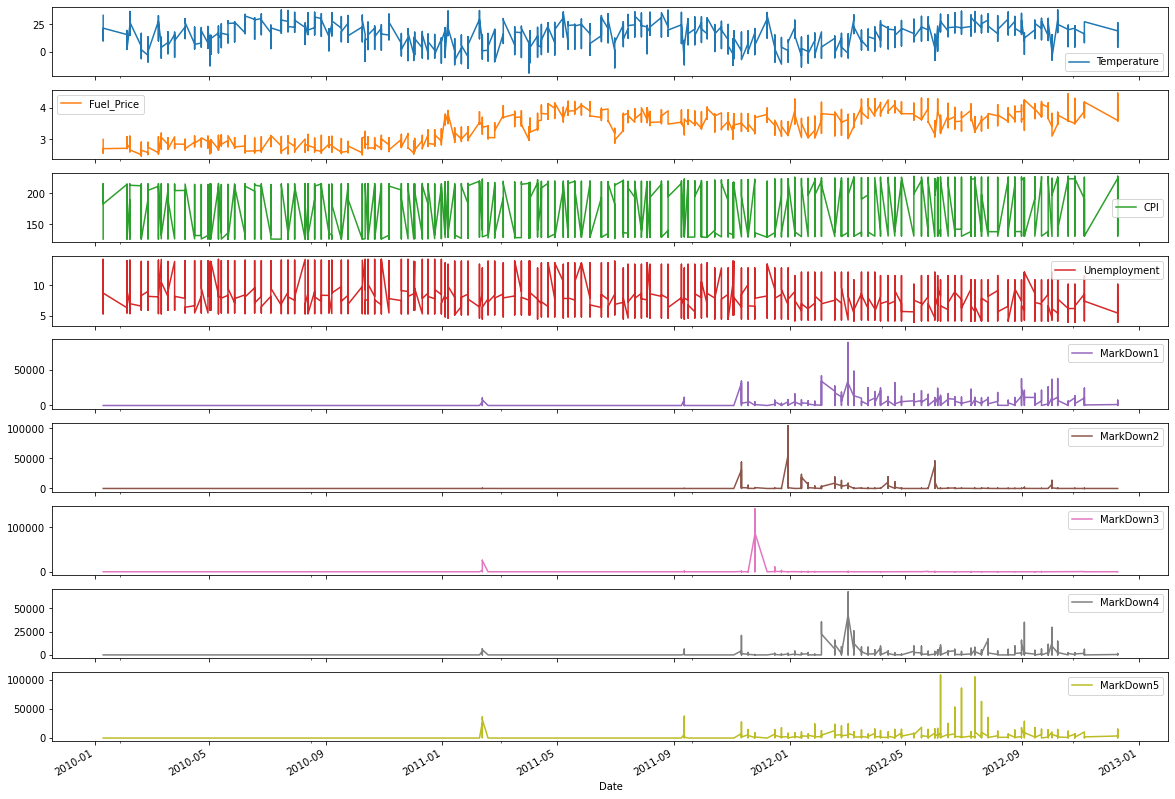

In [47]:
# Plot all the variables against Date to observe any trends

df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

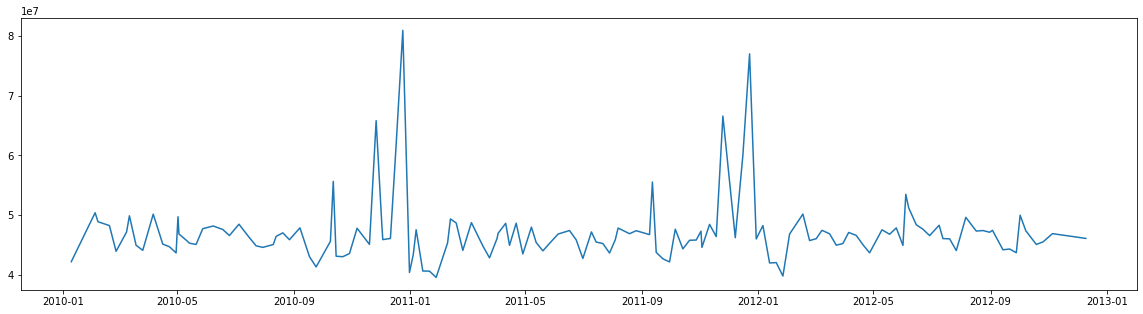

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
...,...,...
138,2012-10-08,47403451.04
139,2012-10-19,45122410.57
140,2012-10-26,45544116.29
141,2012-11-05,46925878.99


In [48]:
# Sum the weekely sales from every shop to get the total weekly sales volume of the retail chain
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()

plt.figure(figsize=(20,5))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.show()

In [41]:
# Sort sales from highest to lowest
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

# Best weeks for sales

df_average_sales.head()

ValueError: 'Date' is both an index level and a column label, which is ambiguous.

In [9]:
# Worst weeks for sales

df_average_sales.tail()

,Date,Weekly_Sales
50,2011-01-14,40673678.04
51,2011-01-21,40654648.03
47,2010-12-31,40432519.00
103,2012-01-27,39834974.67
52,2011-01-28,39599852.99


In [10]:
# Create time series of sales

ts = df_average_sales_week.set_index('Date')

In [11]:
# Top performing type of stores in term of sales

df_top_stores = df.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)

,Type,Weekly_Sales
0,A,4.331015e+09
1,B,2.000701e+09
2,C,4.055035e+08


In [12]:
# Top performing stores in term of sales

df_top_stores = df.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False).head()

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


In [13]:
# Create table of Date and numerical variables

levels = df[['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5','Size']]
levels.head()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size
0,2010-05-02,24924.50,5.727778,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,151315
1,2010-12-02,46039.49,3.616667,2.548,211.242170,8.106,0.0,0.0,0.0,0.0,0.0,151315
2,2010-02-19,41595.55,4.405556,2.514,211.289143,8.106,0.0,0.0,0.0,0.0,0.0,151315
3,2010-02-26,19403.54,8.127778,2.561,211.319643,8.106,0.0,0.0,0.0,0.0,0.0,151315
4,2010-05-03,21827.90,8.055556,2.625,211.350143,8.106,0.0,0.0,0.0,0.0,0.0,151315


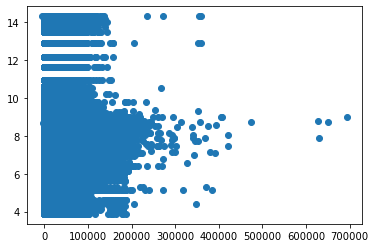

In [14]:
# Compute different correlations

Correlation = levels['Weekly_Sales'].corr(levels['Unemployment'])
plt.scatter(levels['Weekly_Sales'],levels['Unemployment'])

In [30]:
# Compute correlation of levels
correlation1 = levels['Weekly_Sales'].corr(levels['MarkDown5'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.set_index('Date')
changes = changes.pct_change()
correlation2 = changes['Weekly_Sales'].corr(changes['MarkDown5'])
print("Correlation of changes: ", correlation2)

df_average_sales_week.index = pd.to_datetime(df_average_sales_week.Date)

Correlation of levels:  0.05046529333790818
Correlation of changes:  nan


The autocorrelation is:  -0.36125774098578134


(array([733773., 733893., 734016., 734138., 734258., 734381., 734503.,
        734624., 734747., 734869.]),
 <a list of 10 Text major ticklabel objects>)

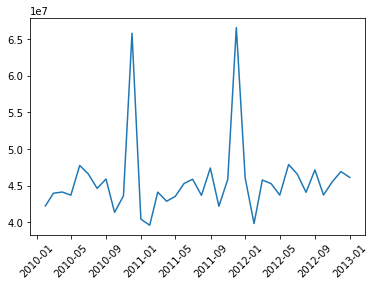

In [20]:
# Autocorrelation of sales data
ts1 = ts.resample(rule='M').last()

ts1['Return'] = ts1['Weekly_Sales'].pct_change()

autocorrelation = ts1['Return'].autocorr()
print("The autocorrelation is: ",autocorrelation)

plt.plot(ts1.index,ts1['Weekly_Sales'])
plt.xticks(rotation=45)

[ 1.00000000e+00  1.85228763e-01 -6.64554730e-05  6.02855273e-02
  2.30328289e-02 -2.54934789e-04 -1.65936173e-01 -5.56861472e-02
 -4.88474825e-02 -9.48262241e-02 -6.39569180e-02  3.05126309e-02
 -4.18576901e-02 -1.11160513e-01 -2.47007476e-02  5.48208984e-02
  1.60143234e-02 -2.87365684e-02 -3.27652911e-02 -4.12971898e-02
 -6.76566266e-02 -2.68484364e-02 -1.56807776e-02  3.06550202e-02
 -1.80730494e-02  6.16442528e-02  6.12828707e-02 -1.39535237e-02
 -2.19813795e-02 -3.29131217e-02 -9.92102493e-02 -7.63872677e-02
 -2.56992257e-02  1.92723316e-02  2.47368646e-03 -2.09379323e-02
 -2.07713905e-02  5.62172171e-02 -2.27172242e-02 -6.77427926e-02
  2.25642764e-02]


C:\Users\elija\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


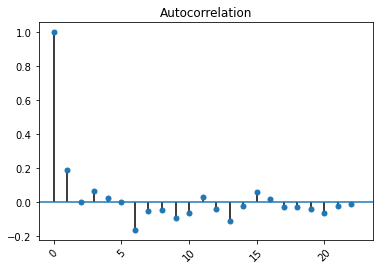

In [22]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

# Compute the acf array of df_average_sales_week
ts = ts[['Weekly_Sales']]
acf_array = acf(ts)
print(acf_array)

# Plot the acf function
plot_acf(ts,alpha=1)
plt.show()


The autocorrelation of weekly MSFT returns is -0.36
The approximate confidence interval is +/- 0.16


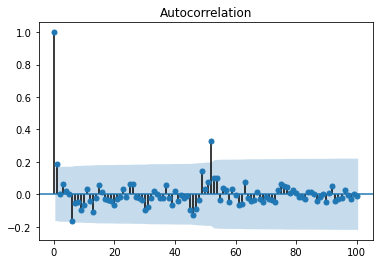

In [25]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(ts)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 100 lags using plot_acf
plot_acf(ts, alpha=0.05, lags=100)
plt.show()

C:\Users\elija\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


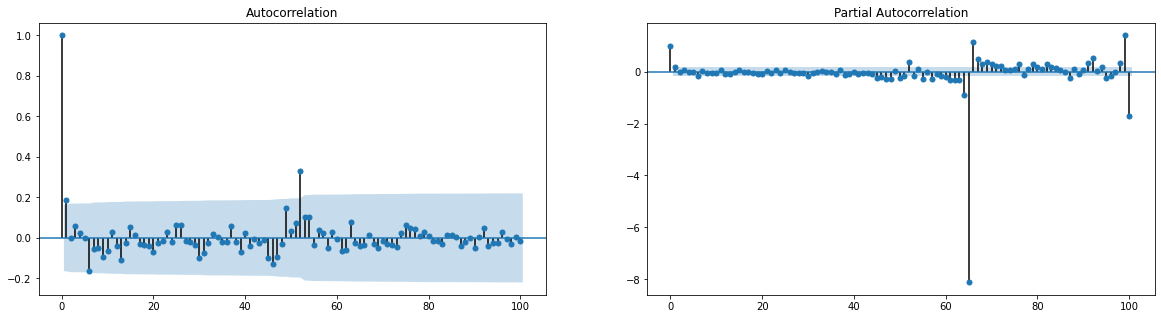

In [26]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(ts, lags=100, ax=axes[0])
plot_pacf(ts, lags=100, ax=axes[1])
plt.show()

The mean is 0.024 and the standard deviation is 0.050


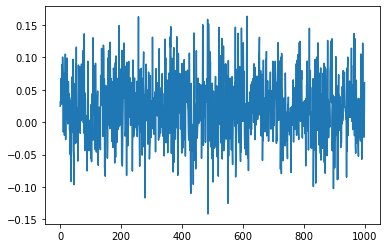

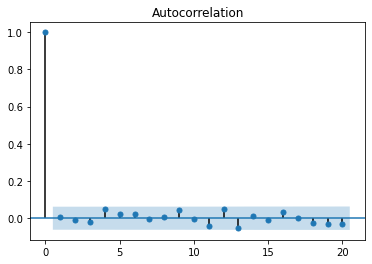

In [28]:
# Comparison to white noise

# Simulate white noise returns
returns = np.random.normal(loc=0.022, scale=0.051, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

In [38]:
# Is the series a random walk? (If p-value below 0.05 can reject random walk hypothesis)
from statsmodels.tsa.stattools import adfuller

results = adfuller(ts['Weekly_Sales'])

print("The p-values is: " + str(results[1]))
print("\n")
print(results)

#The p-value is extremely small, so we can easily reject the hypothesis that returns are a random walk at all levels of significance.

The p-values is: 4.84510284992084e-17


(-9.83772158074679, 4.84510284992084e-17, 0, 142, {'1%': -3.477261624048995, '5%': -2.8821181874544233, '10%': -2.5777431104939494}, 4342.775144198299)


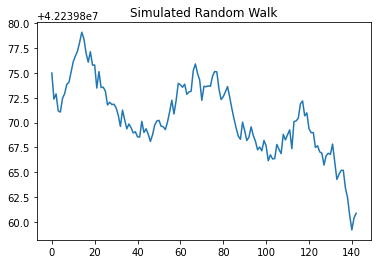

In [75]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=143)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate sales amount, S with a starting sales volume of 42239875
S = 42239875 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(S, label="first random walk")
plt.title("Simulated Random Walk")
plt.show()

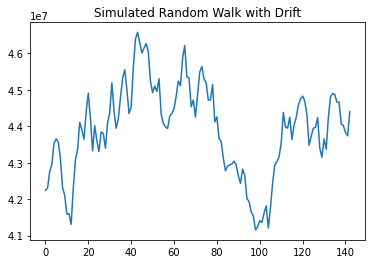

In [74]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=143) + 1

# Set first element to 1
steps[0]=1

# Simulate sales amount, S with a starting sales volume of 42239875, by taking the cumulative product
S = 42239875 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()